In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("heart disease Dataset.csv")
dataset.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0


In [3]:
dataset.shape

(297, 14)

In [4]:
dataset.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [7]:
# Rename columns to simple, real-world names
dataset.rename(columns={
    'age': 'age',
    'sex': 'gender',
    'cp': 'chest_pain',
    'trestbps': 'blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_sugar',
    'restecg': 'ecg_result',
    'thalach': 'heart_rate',
    'exang': 'exercise_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'vessels_count',
    'thal': 'thalassemia_type',
    'condition': 'heart_disease'
}, inplace=True)

In [8]:
dataset.head(2)

,age,gender,chest_pain,blood_pressure,cholesterol,fasting_sugar,ecg_result,heart_rate,exercise_angina,st_depression,st_slope,vessels_count,thalassemia_type,heart_disease
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0


In [9]:
# Notes:
# gender           → 1 = male, 0 = female
# fasting_sugar    → 1 = sugar > 120 mg/dl, 0 = ≤ 120 mg/dl
# exercise_angina  → 1 = pain with exercise, 0 = no pain
# heart_disease    → 1 = has disease, 0 = no disease
# chest_pain       → values from 0 to 3 (types of chest pain)
# ecg_result       → values from 0 to 2 (ECG interpretation)
# st_slope         → 0 = downsloping, 1 = flat, 2 = upsloping
# vessels_count    → number of major vessels (0 to 3)
# thalassemia_type → 1 = normal, 2 = fixed defect, 3 = reversible defect

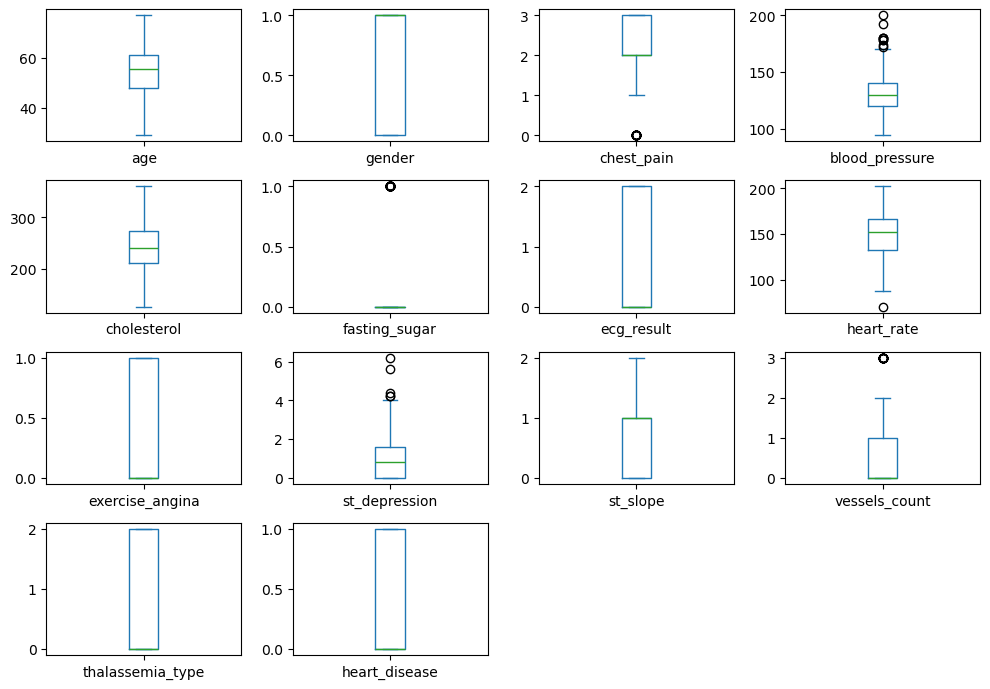

In [33]:
# Plotting boxplots for each column to visually check for outliers in the dataset
dataset.plot(
    kind='box',
    subplots=True,
    layout=((len(dataset.columns)//3),1+3), 
    figsize = (10,7)
)
plt.tight_layout()
plt.show()


In [34]:
# Checking skewness to identify highly skewed features that may contain outliers
print(dataset.skew())

age                -0.196516
gender             -0.817549
chest_pain         -0.830635
blood_pressure      0.713052
cholesterol         0.148930
fasting_sugar       2.040368
ecg_result          0.041314
heart_rate         -0.520425
exercise_angina     0.732784
st_depression       1.263006
st_slope            0.528925
vessels_count       1.195049
thalassemia_type    0.348808
heart_disease       0.151896
dtype: float64


In [12]:
dataset.shape

(297, 14)

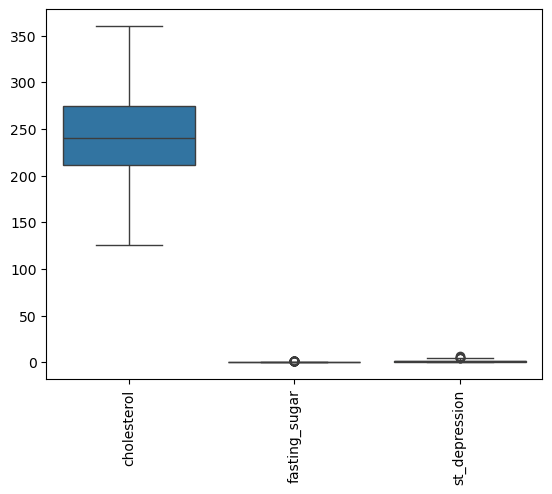

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers in specific columns using boxplots

sns.boxplot(data=dataset[['cholesterol', 'fasting_sugar', 'st_depression']])
plt.xticks(rotation=90)
plt.show()


In [14]:
dataset['cholesterol'].value_counts().sort_index()

cholesterol
126    1
131    1
141    1
149    2
157    1
      ..
394    1
407    1
409    1
417    1
564    1
Name: count, Length: 152, dtype: int64

In [38]:
# Removing outliers from the 'cholesterol' column using the IQR method

Q1 = dataset['cholesterol'].quantile(0.25)
Q3 = dataset['cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers remove 
dataset = dataset[(dataset['cholesterol'] >= lower_bound) & (dataset['cholesterol'] <= upper_bound)]


In [16]:
dataset.shape

(292, 14)

In [17]:
numeric_col = dataset.select_dtypes(["float64", "int64"])
numeric_col = numeric_col.drop(["heart_disease"], axis=1)

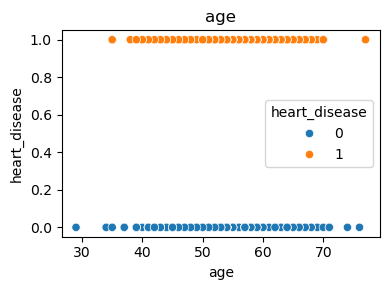

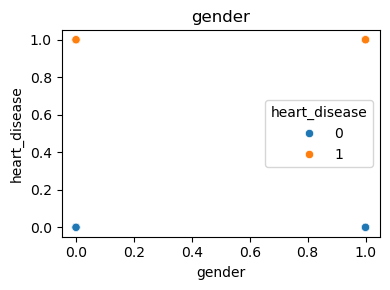

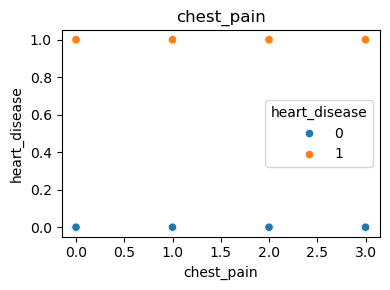

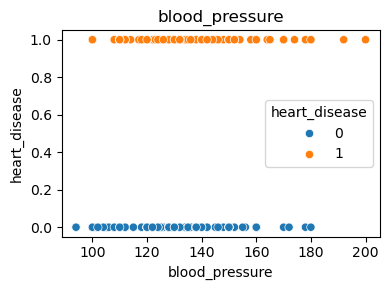

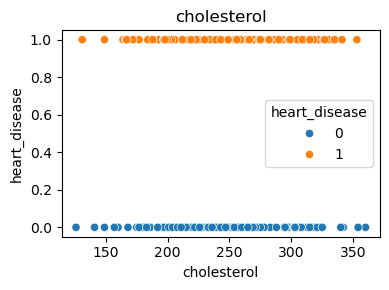

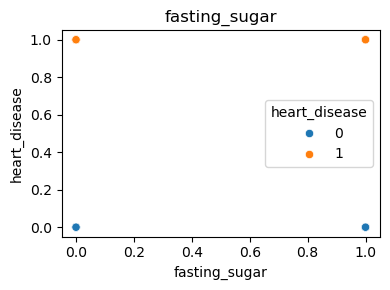

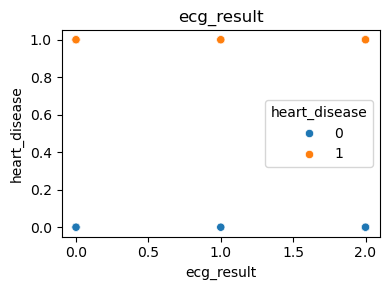

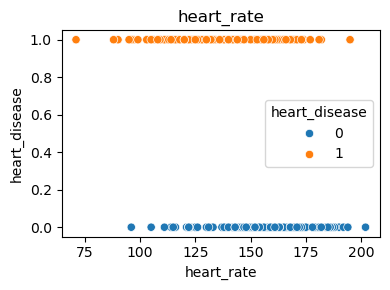

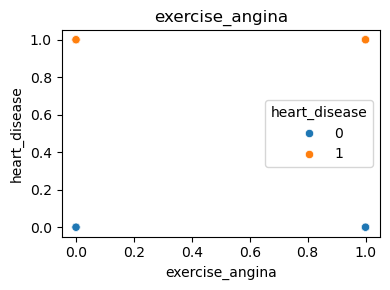

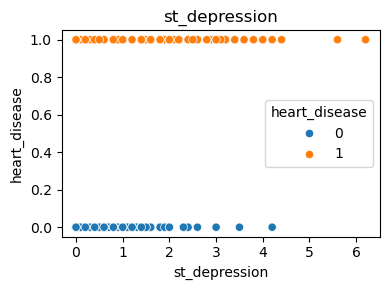

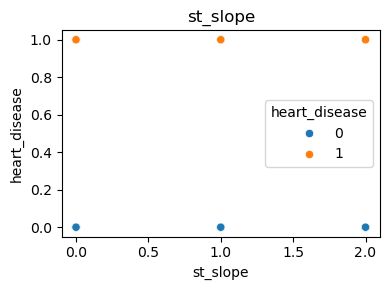

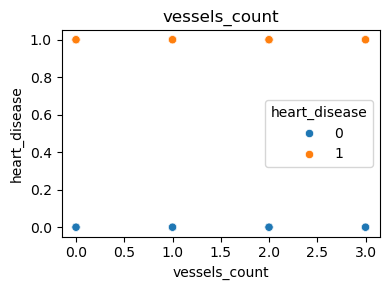

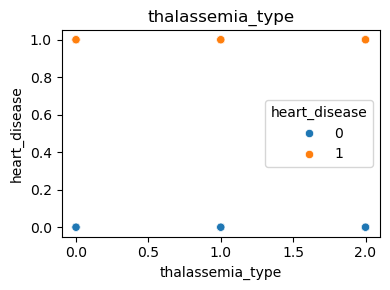

In [39]:
# Checking if the relationship between numeric features and the target is linear or non-linear using scatter plots
for i in numeric_col:
    plt.figure(figsize = (4,3))
    sns.scatterplot(x=i, y="heart_disease", hue="heart_disease", data=dataset)
    plt.title(i)
    plt.tight_layout()
    plt.show()

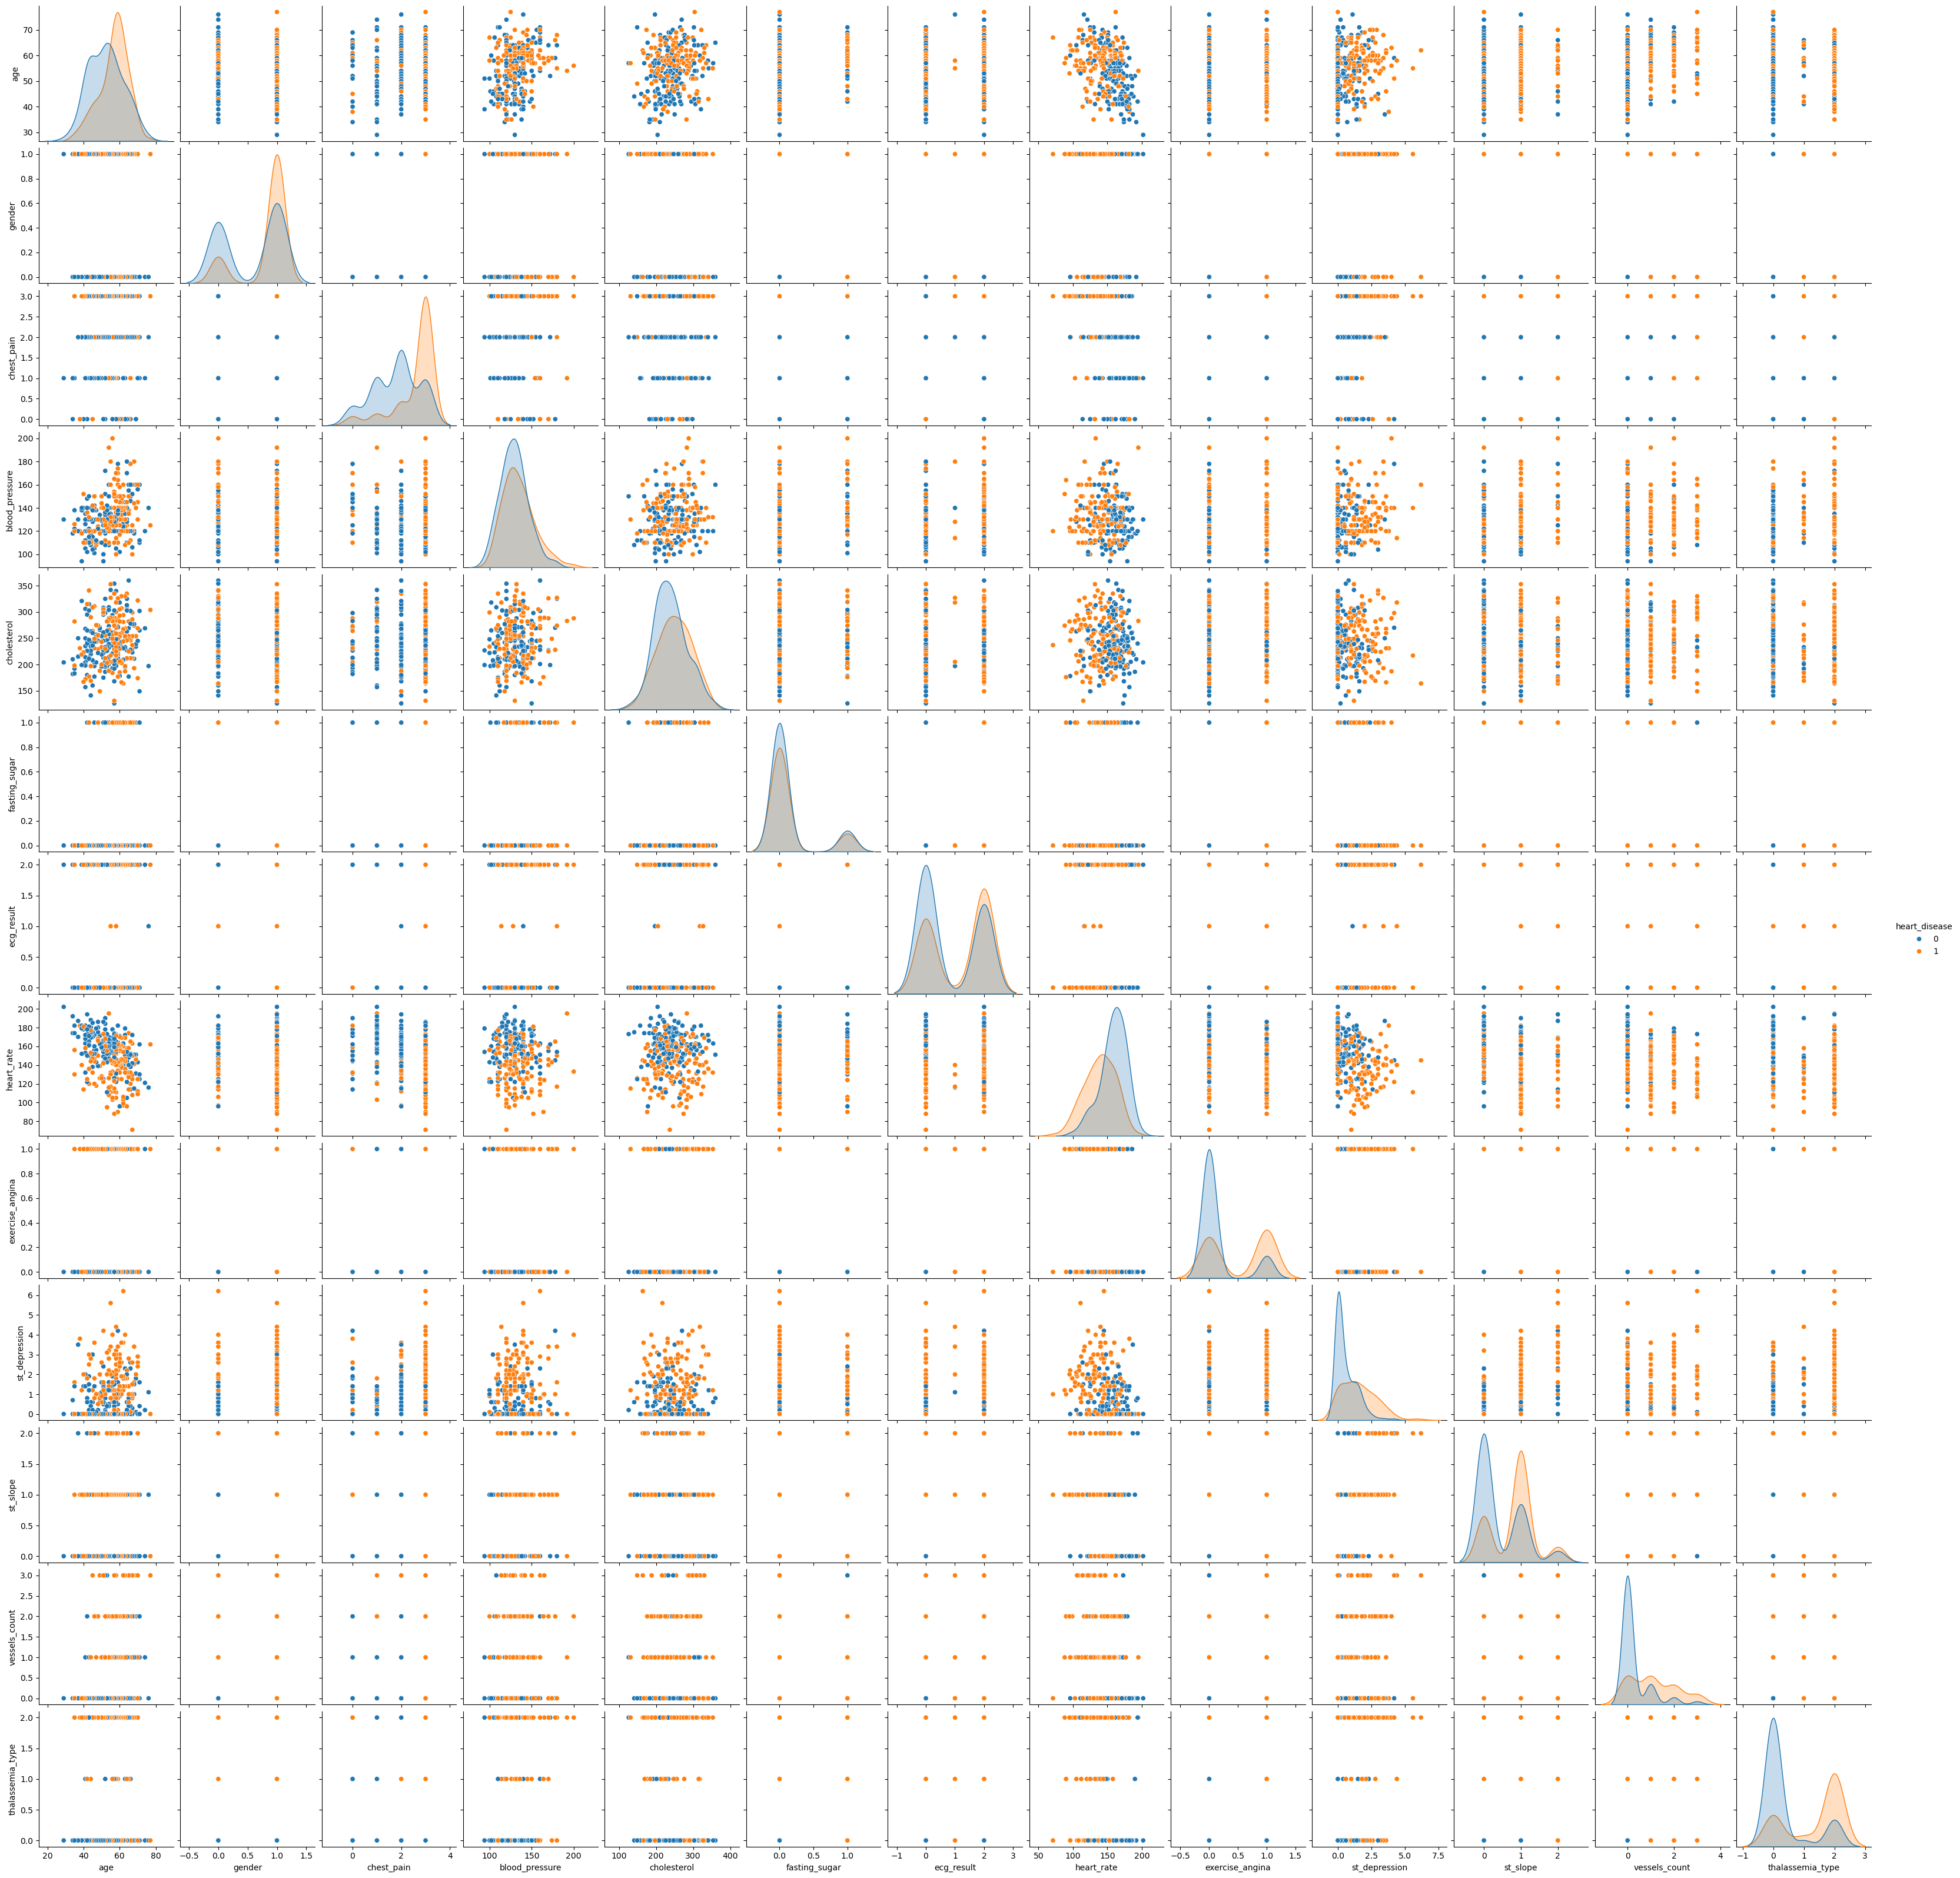

In [40]:
# Using pairplot to visually inspect linear or non-linear relationships between features and the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset, hue="heart_disease")
plt.show()

In [41]:
# Separating features and target variable
x = dataset.drop(["heart_disease"], axis=1)
y = dataset['heart_disease']

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
# Scaling feature values using StandardScaler to normalize the data
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [43]:
# Splitting the dataset into training and testing sets (80% train, 20% test)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [44]:
# Importing machine learning classification models
from sklearn.linear_model import LogisticRegression, RidgeClassifier


# Importing evaluation metrics:
# - accuracy_score: to measure the percentage of correct predictions
# - classification_report: to get precision, recall, f1-score
# - confusion_matrix: to analyze true/false positives and negatives
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**LogisticRegression**

In [ ]:
# Initializing and training the Logistic Regression model on the training data

lr = LogisticRegression()

# Hyperparameter tuning was applied to the LogisticRegression model (e.g., using C, solver, max_iter, etc.)
# However, the accuracy did not improve—in fact, it slightly decreased after tuning.
# Therefore, the final model was used with default parameters without tuning.


lr.fit(x_train, y_train)

LogisticRegression()

In [46]:
# Checking model performance on test and train sets to evaluate accuracy and potential overfitting
lr.score(x_test, y_test)*100, lr.score(x_train, y_train)*100

(83.05084745762711, 84.97854077253218)

In [47]:
# Making predictions on the test set using the trained Logistic Regression model
y_pred = lr.predict(x_test)

In [48]:
# Evaluating model performance using accuracy, classification report, and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8305084745762712
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        34
           1       0.76      0.88      0.81        25

    accuracy                           0.83        59
   macro avg       0.83      0.84      0.83        59
weighted avg       0.84      0.83      0.83        59

Confusion Matrix:
 [[27  7]
 [ 3 22]]


**RidgeClassifier**

In [49]:
# Initializing and fitting the Ridge Classifier model
# Ridge Classifier is a linear model with L2 regularization, effective in handling multicollinearity

rc = RidgeClassifier(
    alpha=0.01,
    solver='lsqr',
    tol=0.01
)

rc.fit(x_train, y_train)

RidgeClassifier(alpha=0.01, solver='lsqr', tol=0.01)

In [50]:
# Evaluating Ridge Classifier performance on test and training sets to check accuracy and possible overfitting
rc.score(x_test, y_test)*100, rc.score(x_train, y_train)*100

(91.52542372881356, 84.97854077253218)

In [51]:
# Making predictions on the test set using the trained Ridge Classifier model
y_pred1 = rc.predict(x_test)

In [52]:
# Evaluating Ridge Classifier performance using standard classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Accuracy: 0.9152542372881356
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       0.92      0.88      0.90        25

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.92        59

Confusion Matrix:
 [[32  2]
 [ 3 22]]


In [53]:
# Final Evaluation:
# The RidgeClassifier outperformed the LogisticRegression model in terms of accuracy and overall classification metrics.
# 
# ✅ RidgeClassifier:
# - Accuracy: 91.52%
# - Better balance between precision and recall
# - Strong F1-score for both classes
# - Confusion Matrix indicates fewer misclassifications
#
# ❌ LogisticRegression:
# - Accuracy: 83.05%
# - Slightly lower precision and recall, especially for class 0
# - Higher number of false positives in the confusion matrix
#
# ✅ Conclusion: RidgeClassifier is a better performing model for this heart disease prediction task.
